In [3]:
from eagles.Supervised.tuner import SupervisedTuner
import pandas as pd

In [4]:
from eagles.data_sets import data_loader as dl

iris = dl.load_iris()
iris.shape

(150, 5)

In [5]:
species = pd.get_dummies(iris['species'])
iris = pd.concat([iris, species], axis=1)
iris.drop(['species'], axis=1, inplace=True)

fts = ['sepal_width', 'petal_length', 'petal_width', 'setosa', 'versicolor', 'virginica']

Performing CV Runs: 5
Finished cv run: 1 time: 0.0294
Finished cv run: 2 time: 0.0116
Finished cv run: 3 time: 0.0076
Finished cv run: 4 time: 0.0097
Finished cv run: 5 time: 0.008


,cv run,rmse_scores,mae_scores
0,1,0.291801,0.226453
1,2,0.295828,0.217582
2,3,0.338605,0.270146
3,4,0.315532,0.258746
4,5,0.296110,0.260238
5,mean,0.307575,0.246633
6,std,0.017575,0.020668


Final cv train test split
rmse score: 0.2961
mae score: 0.2602


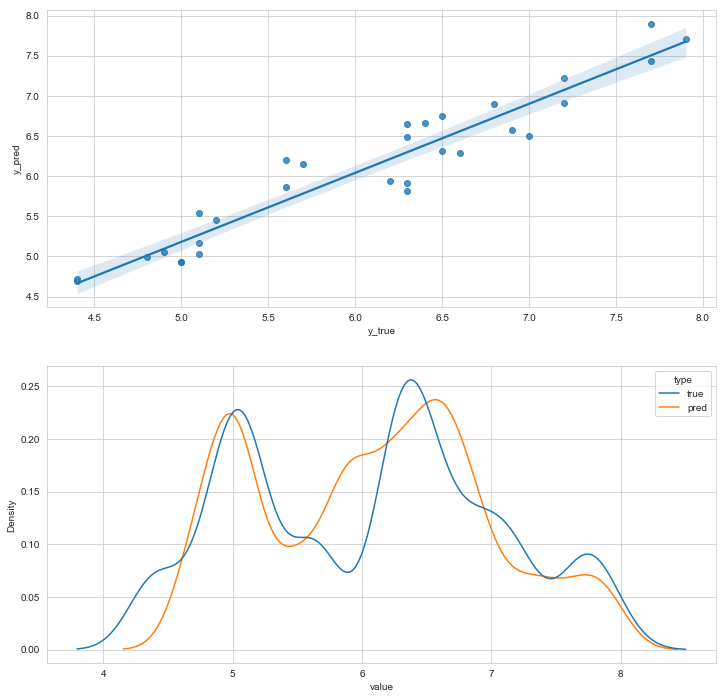

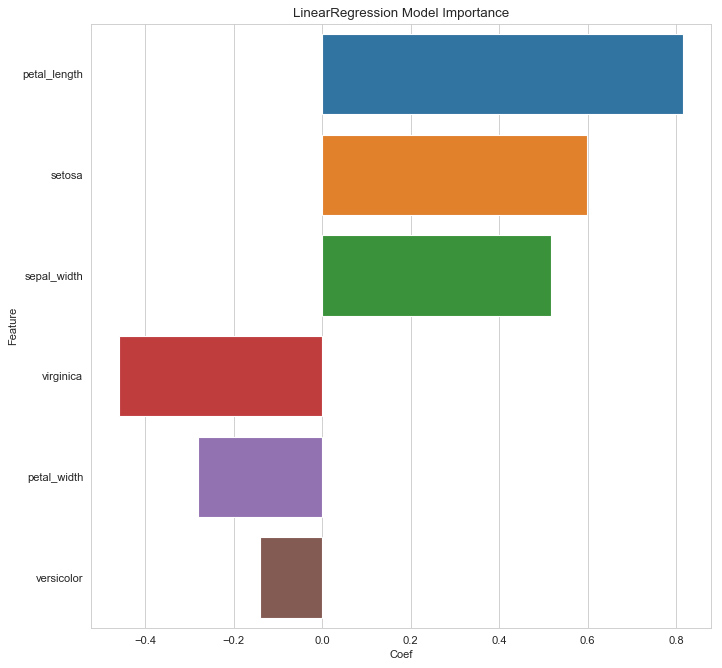

In [4]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    num_cv=5,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="linear",
    params={},
    pipe=None,
    scale=None,
    select_features=None,
)

## ExtraTrees Regressor with Standard Scaling

Performing CV Runs: 5
Finished cv run: 1 time: 0.1997
Finished cv run: 2 time: 0.1676
Finished cv run: 3 time: 0.1461
Finished cv run: 4 time: 0.1577
Finished cv run: 5 time: 0.1464


,cv run,rmse_scores,mae_scores
0,1,0.336235,0.273150
1,2,0.254364,0.190850
2,3,0.390457,0.288817
3,4,0.380696,0.308800
4,5,0.365622,0.308400
5,mean,0.345475,0.274003
6,std,0.049105,0.043655


Final cv train test split
rmse score: 0.3656
mae score: 0.3084


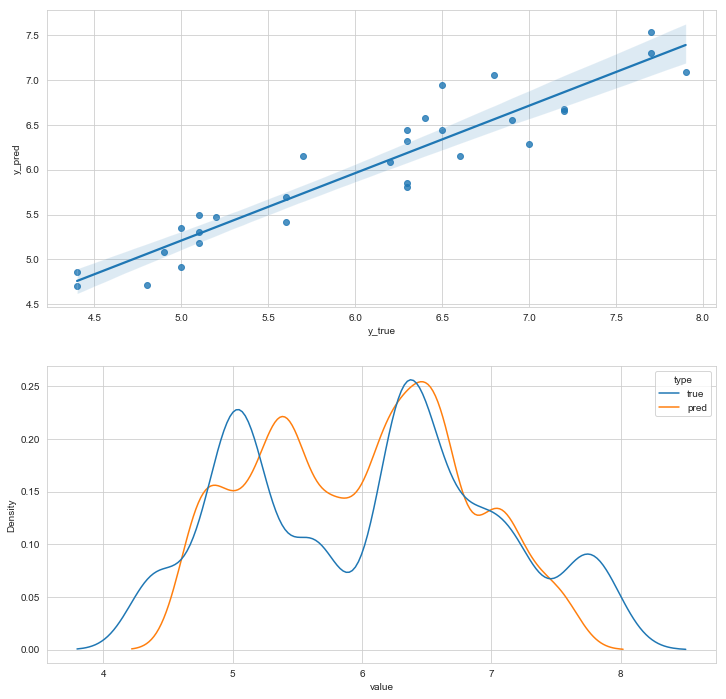

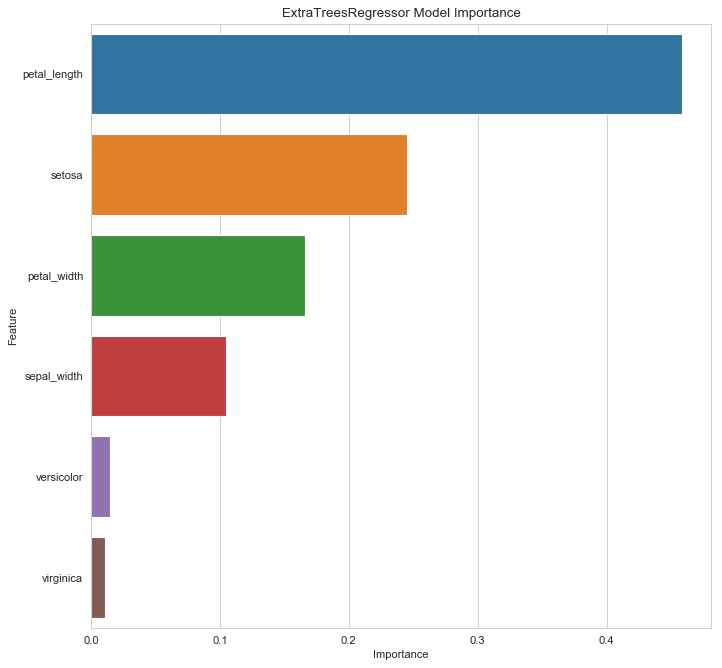

In [5]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    num_cv=5,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="et_regress",
    params={},
    pipe=None,
    scale="standard",
    select_features=None,
)

## Voting Regressor with scaling and select features

Performing CV Runs: 3
Finished cv run: 1 time: 0.2734
Finished cv run: 2 time: 0.2255
Finished cv run: 3 time: 0.2228


,cv run,rmse_scores,mae_scores
0,1,0.345902,0.280511
1,2,0.367241,0.289368
2,3,0.365875,0.297812
3,mean,0.359673,0.289231
4,std,0.009753,0.007064


Final cv train test split
rmse score: 0.3659
mae score: 0.2978


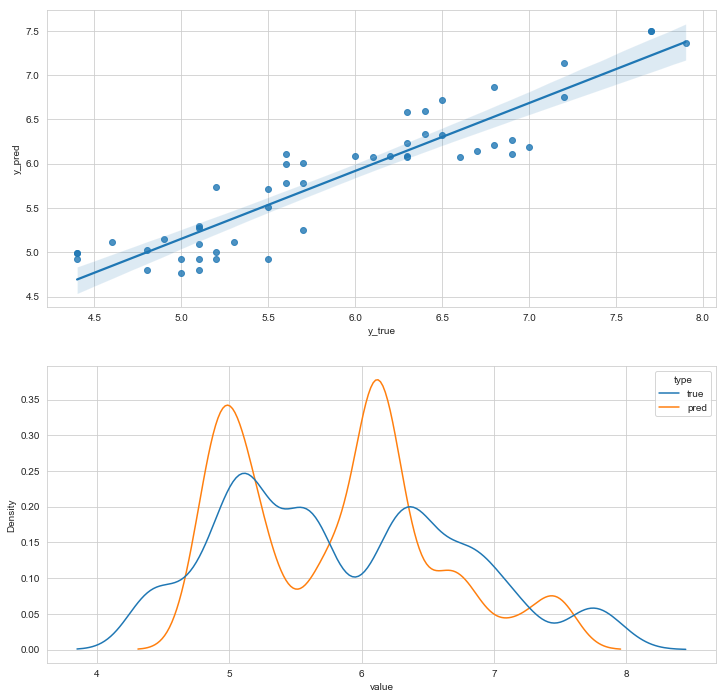

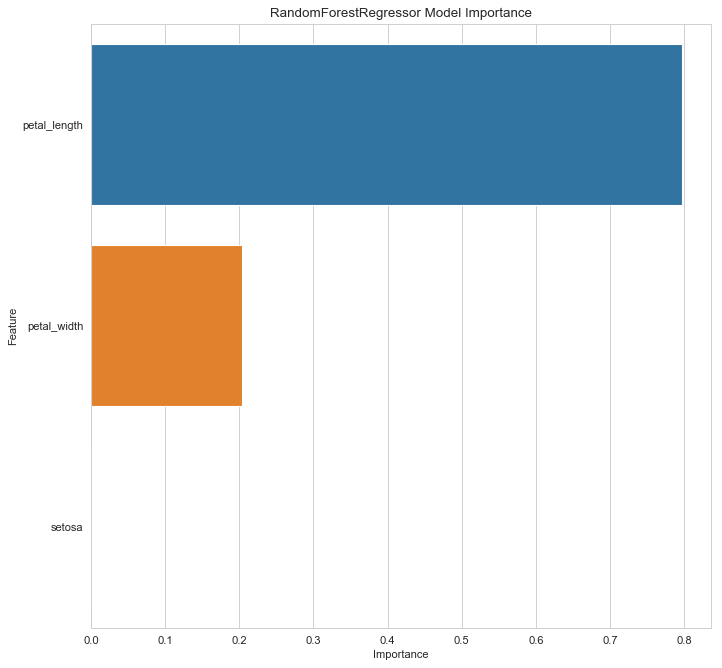

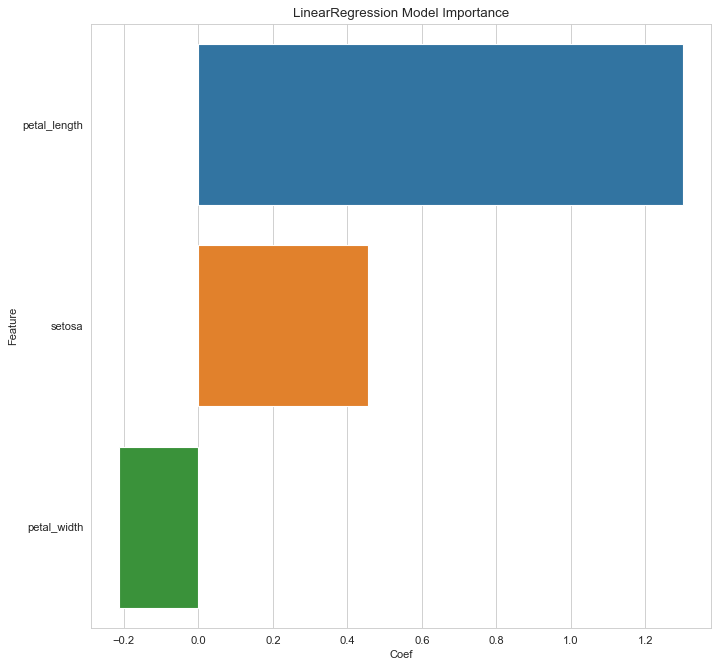

In [6]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    num_cv=3,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="vc_regress",
    params={},
    pipe=None,
    scale="standard",
    select_features="selectkbest",
)

In [1]:
from xgboost import XGBRegressor, XGBClassifier


In [10]:
mod = XGBRegressor()
type(mod).__name__

'XGBRegressor'

In [6]:
mod.fit(iris[fts], iris['setosa'])

[14:53:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jonlandrigan/eagles_env/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
mod.feature_importances_

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
mod.predict(iris[fts])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)